In [86]:
import pandas as pd
import numpy as np
import datetime
import random
import networkx as nx


import matplotlib.pyplot as plt

In [87]:
def f_unique(list1): 
    # Unicos elemento en una lista
    unique_list = [] 
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    return unique_list

def f_vetice():
  resp
  return resp

In [88]:
data = pd.read_csv('dbTransacPyme_v2.csv',sep='|', dtype={'COD_PERSONOR': str, 'COD_PERSONDE': str})

In [89]:
# REEMPLAZAMOS LOS DATOS 

data['COD_PERSONOR'].fillna('NRE', inplace=True)
data['COD_PERSONDE'].fillna('NRD', inplace=True)
data.head()

,COD_PERSONOR,COD_PERSONDE,IDW_CANAL,COD_TRANSAC,FEC_OPER,HMS_OPER,IMP_IMPOPER
0,29586275,NRD,14,FN77,01/09/2019,163738,29.9
1,58487151,NRD,14,FN83,01/09/2019,163935,69.9
2,49826224,NRD,14,FN51,01/09/2019,163147,60.0
3,34555045,NRD,14,FN9A,01/09/2019,163617,3.0
4,42854084,NRD,14,FN77,01/09/2019,163907,390.0


In [92]:
# CREAMOS GRAFOS
G = nx.Graph() 

# Nodos
nodos = list(data['COD_PERSONOR'])+list(data['COD_PERSONOR'])
nodos = f_unique(nodos)
G.add_nodes_from(nodos)

# Aristas
# (Número de contactos)
contacts_number= data[['COD_PERSONOR','COD_PERSONDE','IMP_IMPOPER']].groupby(['COD_PERSONOR','COD_PERSONDE']).agg(['count']).reset_index(drop = False)
edges = [tuple(x) for x in contacts_number[['COD_PERSONOR','COD_PERSONDE']].values]
attributes = list(contacts_number['IMP_IMPOPER']['count'])
for i in range(len(edges)):
    if G.has_edge(*edges[i]):
        G[edges[i][0]][edges[i][1]]['contacts_number'] = G[edges[i][0]][edges[i][1]]['contacts_number'] + attributes[i]
    else:
        G.add_edge(edges[i][0], edges[i][1], contacts_number=attributes[i])

# (Monto medio)
mean_amount = data[['COD_PERSONOR','COD_PERSONDE','IMP_IMPOPER']].groupby(['COD_PERSONOR','COD_PERSONDE']).agg(['mean']).reset_index(drop = False)
edges = [tuple(x) for x in mean_amount[['COD_PERSONOR','COD_PERSONDE']].values]
attributes = list(mean_amount['IMP_IMPOPER']['mean'])
for i in range(len(edges)):
    if G.has_edge(*edges[i]):
        #G[edges[i][0]][edges[i][1]]['mean_amount'] = G[edges[i][0]][edges[i][1]]['mean_amount'] + attributes[i]
        pass
    else:
        #G.add_edge(edges[i][0], edges[i][1], mean_amount=attributes[i])
        pass
# Guardando grafo
nx.write_graphml(G, 'Grafo.graphml')


In [93]:
G = nx.read_graphml('Grafo.graphml')
print('Nodos:',len(G.nodes))

Nodos: 44702


Nodo procesado: 01238624


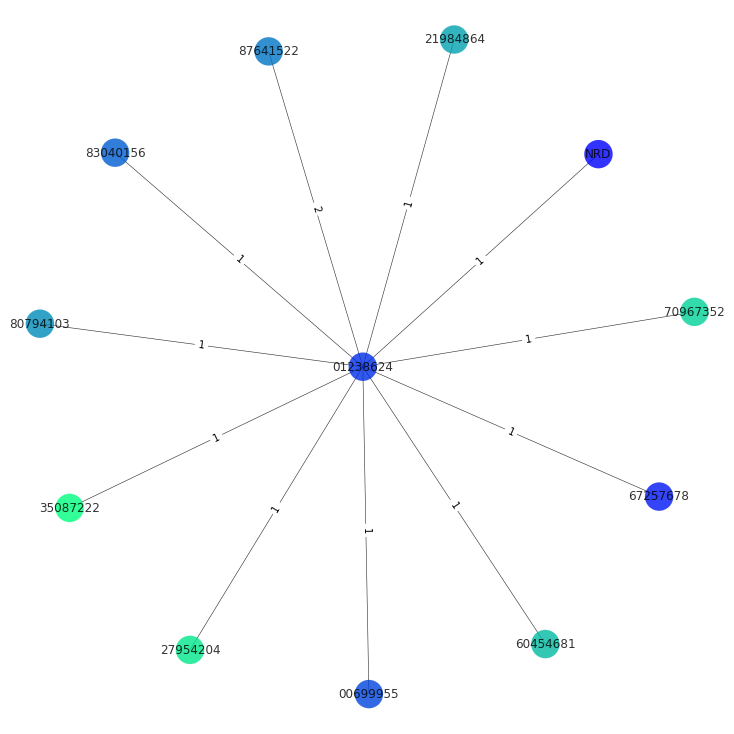

In [99]:
random_nodes = random.sample(list(G.nodes()), 1)
node_to = random_nodes[0]
node_to = '01238624'
print('Nodo procesado:',node_to)
#13713152,01238624

nodes_to = [node_to] + list(G.neighbors(node_to))
H = G.subgraph(nodes_to)
H = nx.Graph(H)

ebunch = []
for e in H.edges():
    if node_to != e[0] and node_to != e[1]:
        ebunch.append(e)
        
H.remove_edges_from(ebunch)


# GRAFICANDO
pos = nx.spring_layout(H)
plt.figure(figsize=(10,10))  


tags = {node:node for node in H.nodes()}

color_map = []
for node in H:
    if node == node_to:
        color_map.append('yellow')
    else: 
        color_map.append('pink') 

tags = {}
for node in H:
    if node == node_to:
        tags[node] = node
    else: 
        tags[node] = ''
        tags[node] = node
        
        
        
nx.draw(H,pos,width=0.6,linewidths=0.1,node_size=800,node_color=range(len(nodes_to)),\
        alpha=0.8,labels=tags, cmap=plt.cm.winter)

contacts = nx.get_edge_attributes(H,'contacts_number')

nx.draw_networkx_edge_labels(H, pos, edge_labels = contacts,font_color = 'black')
plt.axis('off')
plt.show()




In [95]:
pos = nx.spring_layout(G)
nx.draw(G,pos = pos,node_size=90)

KeyboardInterrupt: ignored